In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import statsmodels.api as sm

# Load the sunspots dataset
sunspot = sm.datasets.sunspots.load_pandas().data

# Display the first few rows of the dataset
print(sunspot.head())

     YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0


In [12]:
sunspot.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


<Axes: >

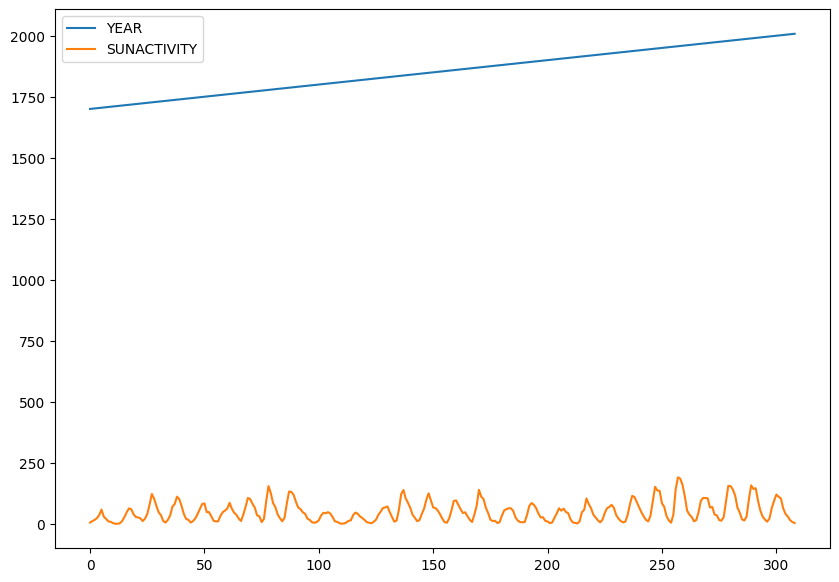

In [15]:
sunspot.plot(figsize=(10,7))

In [23]:
sunspot.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del sunspot["YEAR"]

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt 

<Axes: >

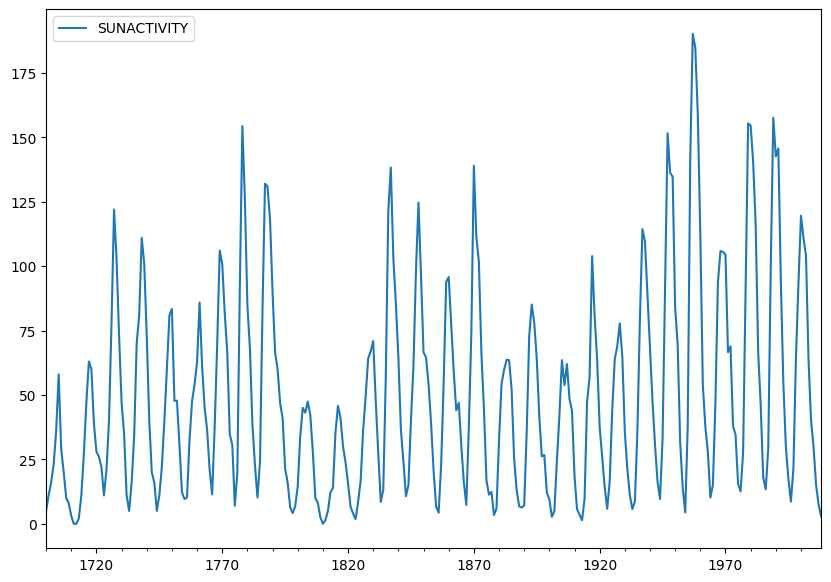

In [26]:
sunspot.plot(figsize=(10,7))

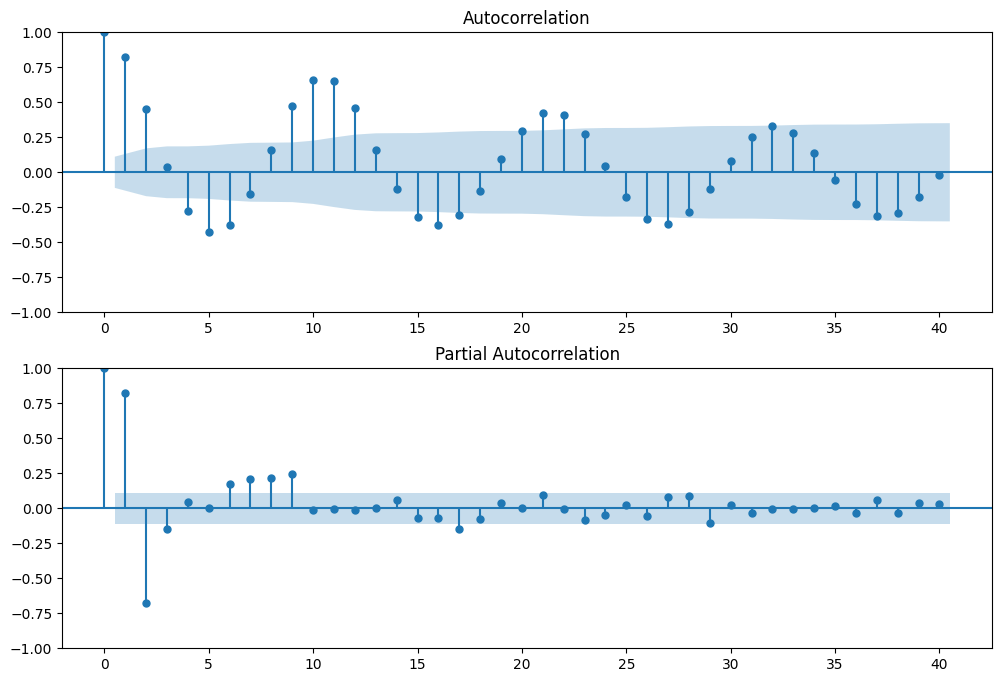

In [25]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sunspot.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sunspot, lags=40, ax=ax2)

In [27]:
sarima_mod = SARIMAX(sunspot, order=(2, 0, 0), seasonal_order=(1, 0, 1, 12)).fit()
print(sarima_mod.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63751D+00    |proj g|=  7.07824D-01

At iterate    5    f=  4.33954D+00    |proj g|=  4.13658D-02

At iterate   10    f=  4.32671D+00    |proj g|=  1.88554D-02

At iterate   15    f=  4.30589D+00    |proj g|=  1.21834D-02

At iterate   20    f=  4.30000D+00    |proj g|=  3.37413D-03

At iterate   25    f=  4.29735D+00    |proj g|=  4.04164D-03

At iterate   30    f=  4.29707D+00    |proj g|=  5.38517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [28]:
print(sarima_mod.aic, sarima_mod.bic, sarima_mod.hqic)

2665.586975255845 2684.253681640334 2673.0499600624025


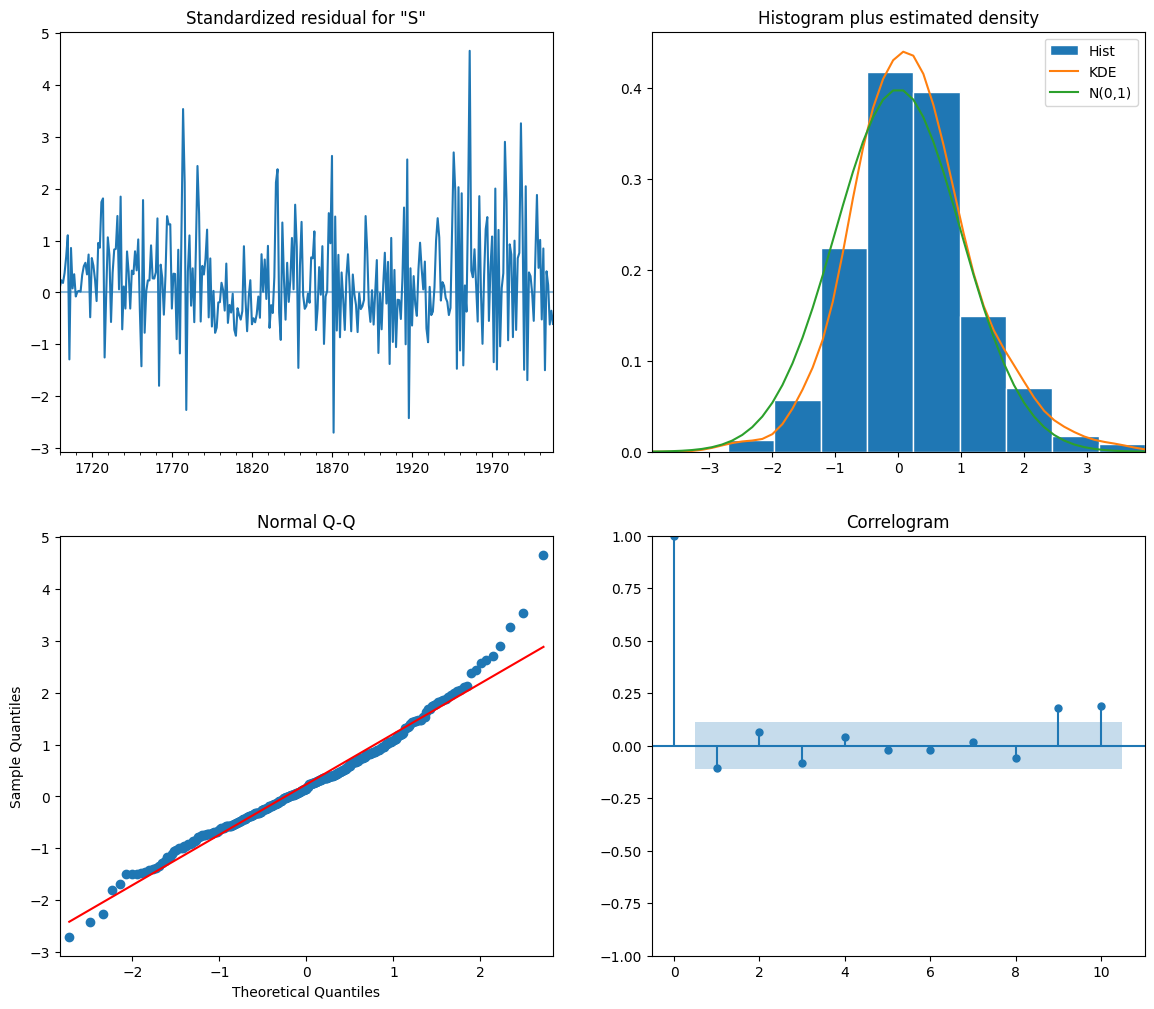

In [31]:
sarima_mod.plot_diagnostics(figsize=(14, 12))
plt.show()

In [33]:
predict_sunspot = sarima_mod.predict('1992', '2014', dynamic=False)

(-20.0, 38.0, -4.0, 200.0)

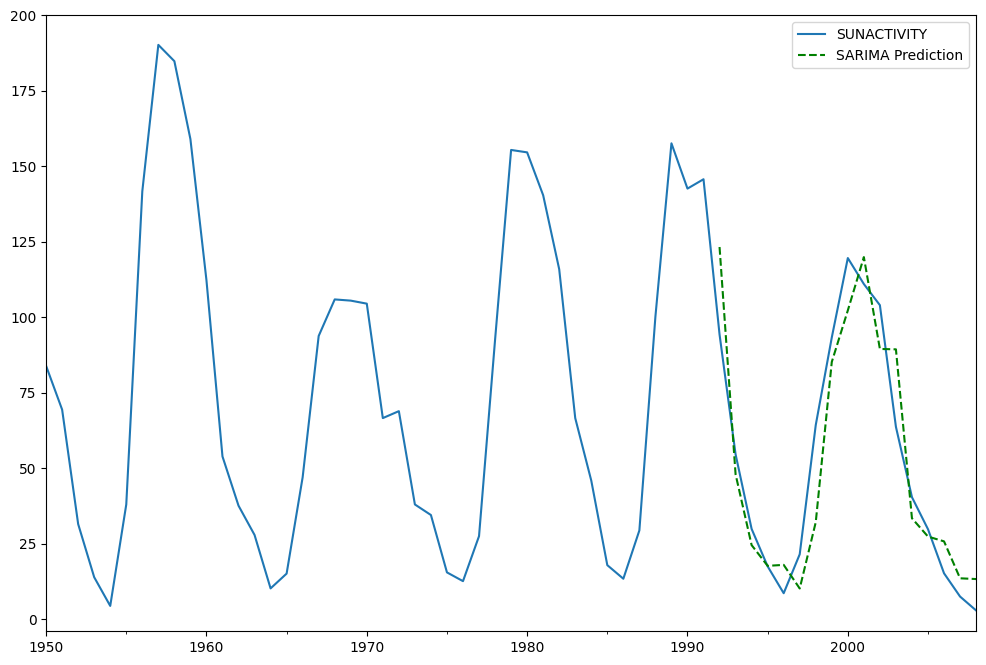

In [36]:
ax = dta.loc['1950':].plot(figsize=(12, 8))
ax = predict_sunspot.plot(ax=ax, style='g--', label='SARIMA Prediction')
ax.legend()
ax.axis((-20.0, 38.0, -4.0, 200.0))

In [37]:
def mean(y, yhat):
    return y.sub(yhat).mean()

def mean_(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))

In [39]:
print("MFE = ", mean(sunspot.SUNACTIVITY, predict_sunspot))
print("MAE = ", mean_(sunspot.SUNACTIVITY, predict_sunspot))

MFE =  0.27777936745815085
MAE =  0.010347597604206366
